In [1]:
import cobra
import pandas as pd
import modelseedpy
%run analysis.py

modelseedpy 0.3.3


In [2]:
model_rhoda = cobra.io.load_json_model('./data/model_rhoda_gf.json')
model_acido = cobra.io.load_json_model('./data/model_acido_gf.json')

Set parameter TSPort to value 27070
Set parameter TokenServer to value "lic-vmw-01.cels.anl.gov"


### Calculate MAX ATPM

In [3]:
df_growth_data_r12 = pd.read_csv('./data/growth_data_R12.tsv', sep='\t')
df_growth_data_3h11 = pd.read_csv('./data/growth_data_3H11.tsv', sep='\t')

In [4]:
exp_data_3h11 = {
    'time_total': 71,
    'ac_uptake': -1.7762543,
    'growth_OD': 0.07776,
    'OD_coeff': 0.006,
    'no3_uptake': -9.00923926
}
exp_data_r12 = {
    'time_total': 336,
    'ac_uptake': -5.4139872,
    'growth_OD': 0.40074,
    'OD_coeff': 0.008,
    'no3_uptake': -9.03407482
}

In [5]:
calc_max_ATPM(model_acido, exp_data_3h11) # MAX ATPM 9.67570638881224 biomass gDW 0.00046656 OD600 0.07776

('Thiamin [e0]', 100.0)
('Sulfate [e0]', 100.0)
('Na+ [e0]', 34.9324073)
('Molybdate [e0]', 100.0)
('Zn2+ [e0]', 100.0)
('Ca2+ [e0]', 100.0)
('NH3 [e0]', 100.0)
('Ni2+ [e0]', 100.0)
('Phosphate [e0]', 100.0)
('Cl- [e0]', 100.0)
('Mn2+ [e0]', 100.0)
('Cu2+ [e0]', 100.0)
('Mg [e0]', 100.0)
('Vitamin B12 [e0]', 100.0)
('K+ [e0]', 1.3415688)
('H2O [e0]', 100.0)
('H+ [e0]', 100.0)
('tungstate [e0]', 100.0)
('Nitrate [e0]', 9.00923926)
('Fe2+ [e0]', 100.0)
('Co2+ [e0]', 100.0)
('Acetate [e0]', 1.7762543)
MAX ATPM 9.675706388812278
biomass gDW 0.0004665599999999398 OD600 0.07775999999998996


(<Solution 9.676 at 0x7fa98a56b6d0>, <Solution 0.000 at 0x7fa98a56beb0>)

In [6]:
calc_max_ATPM(model_rhoda, exp_data_r12) # MAX ATPM 23.8 biomass gDW 0.0032059199999983842 OD600 0.40073999999979804

('Thiamin [e0]', 100.0)
('Nitrate [e0]', 9.03407482)
('Sulfate [e0]', 100.0)
('Acetate [e0]', 5.4139872)
('Na+ [e0]', 34.9324073)
('Molybdate [e0]', 100.0)
('Zn2+ [e0]', 100.0)
('Ca2+ [e0]', 100.0)
('NH3 [e0]', 100.0)
('Phosphate [e0]', 100.0)
('Cl- [e0]', 100.0)
('Mn2+ [e0]', 100.0)
('Cu2+ [e0]', 100.0)
('Mg [e0]', 100.0)
('K+ [e0]', 1.3415688)
('H2O [e0]', 100.0)
('H+ [e0]', 100.0)
('Fe2+ [e0]', 100.0)
('Co2+ [e0]', 100.0)
MAX ATPM 23.801193202545846
biomass gDW 0.0032059199999999346 OD600 0.4007399999999918


(<Solution 23.801 at 0x7fa98a428970>, <Solution 0.003 at 0x7fa98a429120>)

In [7]:
solution_acido_wt = cobra.flux_analysis.pfba(model_acido)
solution_rhoda_wt = cobra.flux_analysis.pfba(model_rhoda)
print(solution_acido_wt.fluxes['bio1'], solution_rhoda_wt.fluxes['bio1'])

0.0004665599999999398 0.0032059199999999346


### Isolate Fitness

In [8]:
solutions_acido, tests_acido = _isolate_test(model_acido)
solutions_rhoda, tests_rhoda = _isolate_test(model_rhoda)

100%|██████████| 43/43 [00:07<00:00,  5.75it/s]


In [9]:
df_report = _report(solutions_acido, solutions_rhoda, tests_acido)
df_report

,cpd_name,3H11,R12,3H11 (ATP),R12 (ATP),3H11 (acetate),R12 (acetate),3H11 (nitrate),R12 (nitrate)
cpd_id,,,,,,,,,
cpd00020_c0,Pyruvate [c0],1.0,1.0,1.0,0.566667,-1.500000,-1.500000,-1.000000,-1.000000
cpd00107_c0,L-Leucine [c0],1.0,1.0,3.0,1.694444,-4.340909,-4.305556,-2.363636,-2.222222
cpd00039_c0,L-Lysine [c0],1.0,1.0,5.0,2.666667,-4.454545,-4.333333,-3.818182,-3.333333
cpd00119_c0,L-Histidine [c0],1.0,1.0,11.0,6.638889,-6.727273,-5.361111,-8.909091,-8.444444
cpd00322_c0,L-Isoleucine [c0],1.0,1.0,4.0,2.472222,-4.522727,-4.527778,-3.090909,-3.111111
cpd00161_c0,L-Threonine [c0],1.0,1.0,3.0,2.277778,-2.590909,-2.722222,-2.363636,-2.888889
cpd00065_c0,L-Tryptophan [c0],1.0,1.0,13.0,7.861111,-8.204545,-8.138889,-9.818182,-9.555556
cpd00069_c0,L-Tyrosine [c0],1.0,1.0,9.0,5.583333,-6.431818,-6.416667,-6.727273,-6.666667
cpd00054_c0,L-Serine [c0],1.0,1.0,2.0,1.305556,-1.659091,-1.694444,-1.636364,-1.777778


### Build Comm Model

In [23]:
%run ms_ext_symcom.py

In [24]:
cf = CommFactory().with_model(model_acido, 0.7, 'A').with_model(model_rhoda, 0.3, 'R')
model_comm = _build(cf)
if 'bio1' not in model_comm.reactions:
    r_bio_sum = Reaction("bio1", "bio_com", "", 0, 1000)
    r_bio_sum.add_metabolites(
        {
            model_comm.metabolites.cpd11416_cA: -0.4,
            model_comm.metabolites.cpd11416_cR: -0.6,
        }
    )
    model_comm.add_reactions([r_bio_sum])
model_comm.objective = 'bio1'
model_comm

Name,model
Memory address,7fa97d73c700
Number of metabolites,2401
Number of reactions,2598
Number of genes,0
Number of groups,0
Objective expression,1.0*bio1 - 1.0*bio1_reverse_b18f7
Compartments,"cA, e0, cR"


In [25]:
GSP_MEDIUM = {
    'EX_cpd00001_e0': 1000.0,
    'EX_cpd00013_e0': 1000.0,

    'EX_cpd00209_e0': 12.0,
    'EX_cpd00029_e0': 20.0, # acetate
 
    'EX_cpd00218_e0': 100.0,
    'EX_cpd00220_e0': 100.0,
    'EX_cpd00644_e0': 0.0002281,
    'EX_cpd00305_e0': 100.0,
    'EX_cpd00393_e0': 100.0,
    'EX_cpd03424_e0': 100.0,
    'EX_cpd00443_e0': 100.0,
    'EX_cpd00263_e0': 100.0,
    'EX_cpd00048_e0': 100.0,
    'EX_cpd00009_e0': 100.0,
    'EX_cpd00242_e0': 29.759425,
    'EX_cpd00205_e0': 1.3415688,
    'EX_cpd00063_e0': 100.0,
    'EX_cpd00971_e0': 34.9324073,
    'EX_cpd00099_e0': 100.0,
    'EX_cpd00254_e0': 100.0,
    'EX_cpd00030_e0': 100.0,
    'EX_cpd00058_e0': 100.0,
    'EX_cpd00034_e0': 100.0,
    'EX_cpd10515_e0': 100.0,
    'EX_cpd00149_e0': 100.0,
    'EX_cpd00244_e0': 100.0,
    'EX_cpd11574_e0': 100.0,
    'EX_cpd15574_e0': 100.0,
    'EX_cpd00067_e0': 100.0,
 }
model_comm.medium = {rxn_id: v for rxn_id, v in GSP_MEDIUM.items() if rxn_id in model_comm.reactions}

In [26]:
#model_comm.reactions.LeuE_cA.upper_bound = -10
solution_comm_wt = cobra.flux_analysis.pfba(model_comm)
model_comm.summary(solution_comm_wt)

Metabolite,Reaction,Flux,C-Number,C-Flux
cpd00009_e0,EX_cpd00009_e0,0.04759,0,0.00%
cpd00013_e0,EX_cpd00013_e0,0.5761,0,0.00%
cpd00029_e0,EX_cpd00029_e0,8.917,2,99.99%
cpd00030_e0,EX_cpd00030_e0,0.0001152,0,0.00%
cpd00034_e0,EX_cpd00034_e0,0.0001152,0,0.00%
cpd00048_e0,EX_cpd00048_e0,0.02151,0,0.00%
cpd00058_e0,EX_cpd00058_e0,0.0001152,0,0.00%
cpd00063_e0,EX_cpd00063_e0,0.0001152,0,0.00%
cpd00067_e0,EX_cpd00067_e0,20.45,0,0.00%
cpd00099_e0,EX_cpd00099_e0,0.0001152,0,0.00%


## SynCom Fitness

In [14]:
from tqdm import tqdm
import numpy as np
sols = {}
order = []
it = 0
for i in tqdm(np.arange(0.0, 40.2, 1)):
    i = round(i, 4)
    #print(i)
    model_comm.reactions.EX_cpd00209_e0.lower_bound = -i
    try:
        sol = cobra.flux_analysis.pfba(model_comm)
        sols[it] = sol
    except Exception:
        sols[it] = None
    order.append(it)
    it += 1

100%|██████████| 41/41 [00:13<00:00,  2.94it/s]


<Axes: xlabel='i', ylabel='value'>

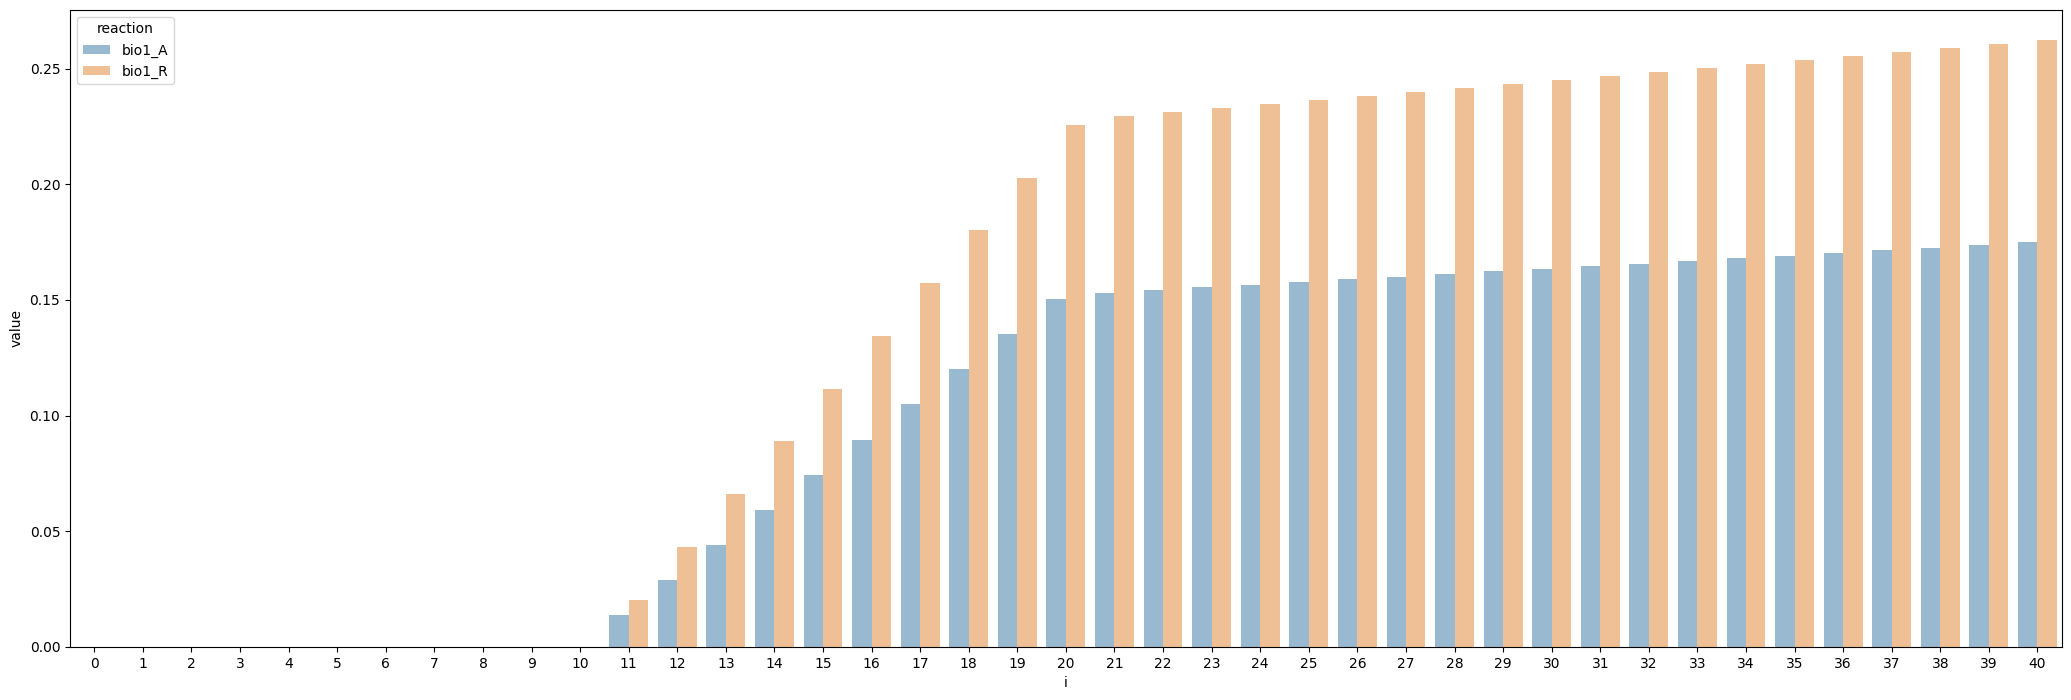

In [15]:
import numpy as np
fba_results = {
    'order': order,
    'fba': {}
}
for i in order:
    fba_results['fba'][i] = {
        'status': sols[i].status if sols[i] else None,
        'fluxes': sols[i].fluxes.to_dict() if sols[i] else {}
    }
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_data = {
    'i': [],
    'reaction': [],
    'value': []
}
monitor = ['bio1_A', 'bio1_R']
for i in fba_results['order']:
    sol = fba_results['fba'][i]
    for m in monitor:
        m_flux = sol['fluxes'].get(m, 0)
        df_data['i'].append(i)
        df_data['reaction'].append(m)
        df_data['value'].append(math.fabs(m_flux))
df_bar = pd.DataFrame(df_data)
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.barplot(data = df_bar, x='i', y='value', hue='reaction', alpha=0.5, ax=ax)

In [16]:
import math
import pandas as pd
import seaborn as sns

alias = {
    'dnr00004_cA': 'Nos (A)',
    'dnr00004_cR': 'Nos (R)',
    'rxn05488_cA': 'AC (A)',
    'rxn05488_cR': 'AC (R)',
    'dnr00003_cA': 'Nor (A)',
    'dnr00003_cR': 'Nor (R)',
    'dnr00001_cA': 'Nar (A)',
    'dnr00001_cR': 'Nar (R)',
    'dnr00002_cR': 'Nir (R)',
    'rxn09004_cR': 'Nitrate (A)',
    'rxn09004_cA': 'Nitrate (R)',
    
    'rxn08173_cA': 'ATPS (A)',
    'rxn08173_cR': 'ATPS (R)',
    
    'rxn05625_cA': 'Nitrite (A)',
    'rxn05625_cR': 'Nitrite (R)',
    
    'rxn01806_cR': 'NO -> N2O (A)',
    'rxn01806_cA': 'NO -> N2O (R)',
    'rxn05467_cA': 'CO2 (A)',
    'rxn05467_cR': 'CO2 (R)',
    
    'EX_cpd00528_e0': 'N2 (e)',
    'EX_cpd00659_e0': 'N2O (e)',
    'EX_cpd00418_e0': 'NO (e)',
    'EX_cpd00209_e0': 'Nitrate (e)',
    'EX_cpd00075_e0': 'Nitrite (e)',
    'EX_cpd00029_e0': 'AC (e)',
}
palette = {
    'Nos (A)': 'blue',
    'Nos (A)': 'blue',
    'Nor (A)': 'blue',
    'Nor (R)': 'blue',
    'Nar (A)': 'blue',
    'Nar (R)': 'blue',
    'Nir (R)': 'blue',
}
monitor_A = [
    'rxn05488_cA',  # acetate uptake
    'dnr00004_cA',   # Nos
    #'dnr00003_cA',   # Nor
                     # Nir
    'dnr00001_cA',   # Nar
    #'rxn09004_cR', 'rxn09004_cA',
    #'rxn01806_cR', 'rxn01806_cA',
    #'rxn08173_cA', 'rxn08173_cR',
    #'rxn05467_cA', 'rxn05467_cR',
    #'EX_cpd00528_e0',
    #'EX_cpd00659_e0',
    #'EX_cpd00418_e0',
    #'EX_cpd00209_e0',
    #'EX_cpd00075_e0'
    #'EX_cpd00029_e0'
]
monitor_R = [
    'rxn05488_cR', # acetate uptake
    'dnr00004_cR',  # Nos
    #'dnr00003_cR',  # Nor
    'dnr00001_cR',  # Nar
    'dnr00002_cR',  # Nir
    
    
    #'rxn09004_cR', 'rxn09004_cA',
    #'rxn01806_cR', 'rxn01806_cA',
    #'rxn08173_cA', 'rxn08173_cR',
    #'rxn05467_cA', 'rxn05467_cR',
    #'EX_cpd00528_e0',
    #'EX_cpd00659_e0',
    #'EX_cpd00418_e0',
    #'EX_cpd00209_e0',
    #'EX_cpd00075_e0'
    #'EX_cpd00029_e0'
]
monitor2 = {
    
    #'rxn05625_cA': [],
    #'rxn05625_cR': [],
    #'rxn09008_cA': [],
    #'rxn09008_cR': [],
    #'rxn08966_cA': [],
    #'rxn08966_eR': [],
    
}

df_array = []

for monitor in [monitor_A, monitor_R]:

    df_data = {
        'i': [],
        'reaction': [],
        'value': []
    }
    for i in range(len(sols)):
        sol = sols[i]
        for m in monitor:
            df_data['i'].append(i)
            df_data['reaction'].append(alias[m])
            df_data['value'].append(math.fabs(sol.fluxes[m] if sol else 0))
        for m in monitor2:
            df_data['i'].append(i)
            df_data['reaction'].append(alias[m])
            df_data['value'].append(sol.fluxes[m] if sol else 0)
    df_line = pd.DataFrame(df_data)
    df_array.append(df_line)

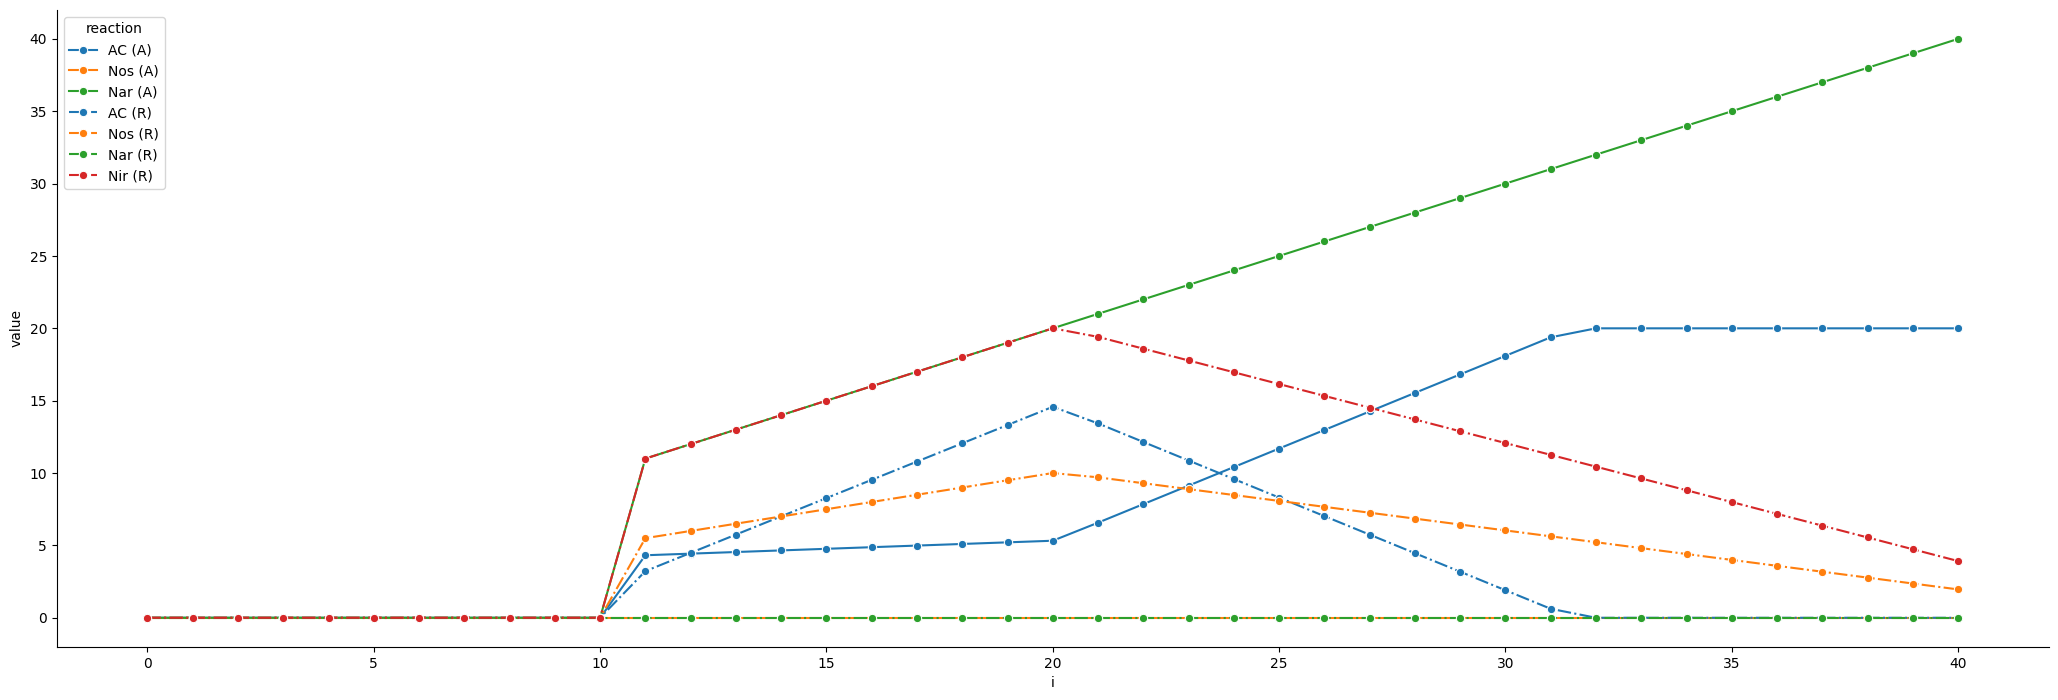

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(25.7, 8.27)
sns.lineplot(data = df_array[0], x='i', y='value', hue='reaction', marker='o', sort = False, ax=ax, linestyle='-')
sns.lineplot(data = df_array[1], x='i', y='value', hue='reaction', marker='o', sort = False, ax=ax, linestyle='-.')
sns.despine(fig, ax)

In [81]:
%run ./plots.py

In [82]:
comm_plots = CommPlots(model_comm)

In [83]:
atpm_max_cA_isolate, atpm_max_cR_isolate, time_steps, expected_growth_60R_40A, rates = comm_plots.constants()

*USE CPLEX/Gurobi*

In [84]:
model_comm.reactions.ATPM_cA.lower_bound = 0
model_comm.reactions.ATPM_cR.lower_bound = 0
solution_array = comm_plots.generate_solutions(cobra, rates, expected_growth_60R_40A)
solution_exp = comm_plots.generate_growth_gap_solutions(cobra, expected_growth_60R_40A, rates, solution_array)

0 GROWTH 0 ATPM, exceess 0.00024181595894612575 0.00023783091894612576
0 MAX isolate ATPM 0.043089880576308914 0.04315455545832608
1 GROWTH 0 ATPM, exceess 0.0023429918445492773 0.0022989809445492773
1 MAX isolate ATPM 0.4698918189506963 0.46987796748823346
2 GROWTH 0 ATPM, exceess 0.0038323571112274923 0.0037943738112274925
2 MAX isolate ATPM 0.7293626516807326 0.7293287805702215
3 GROWTH 0 ATPM, exceess 0.0012268888097429374 0.0012094088097429373
3 MAX isolate ATPM 0.18909052593399006 0.18909026667506554
4 GROWTH 0 ATPM, exceess 0.0011562582198229997 0.0011474682198229997
4 MAX isolate ATPM 0.17042155095487982 0.17042280866004475
5 GROWTH 0 ATPM, exceess 0.0004212424670850133 0.0004127314670850133
5 MAX isolate ATPM 0.07225696830409423 0.0722611972604818
6 GROWTH 0 ATPM, exceess 1.2819727238886472e-05 1.4281637238886471e-05
6 MAX isolate ATPM 0.00111280125 0.0011128012500000002
Acetate: -0.00796337 NO3 -0.015765185 NO2 -0.000300664 min community biomass 3.98504e-06 mATP 3H11 0.017235

In [85]:
solution_leucine_50 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.5)
solution_leucine_10 = comm_plots.generate_leucine_efflux_data(cobra, solution_exp, expected_growth_60R_40A, rates, 0.1)

0 -0.01725990643286713
1 -0.18798095742879492
2 -0.2917459646740326
3 -0.07563495405740918
4 -0.06816803312546624
5 -0.02889911343202695
6 -0.0004451205000000019
0 -0.0035125830885430476
1 -0.037590086983591
2 -0.05835936915491746
3 -0.01512691715760607
4 -0.013633911985842191
5 -0.005779358980663875
6 -8.902410000000035e-05


In [86]:
exp_syncom = comm_plots.get_exp_syncom()

Biomass 3H11 0.0008575773279999989 Biomass R12 0.0013000459919999979 Biomass Total 0.002157623319999997 Time 141 Acetate 12.911881377007354 NO3 0.11462903200001467 NO2 1.6044951247698176 N2O 0.0 N2 3.762579806615092


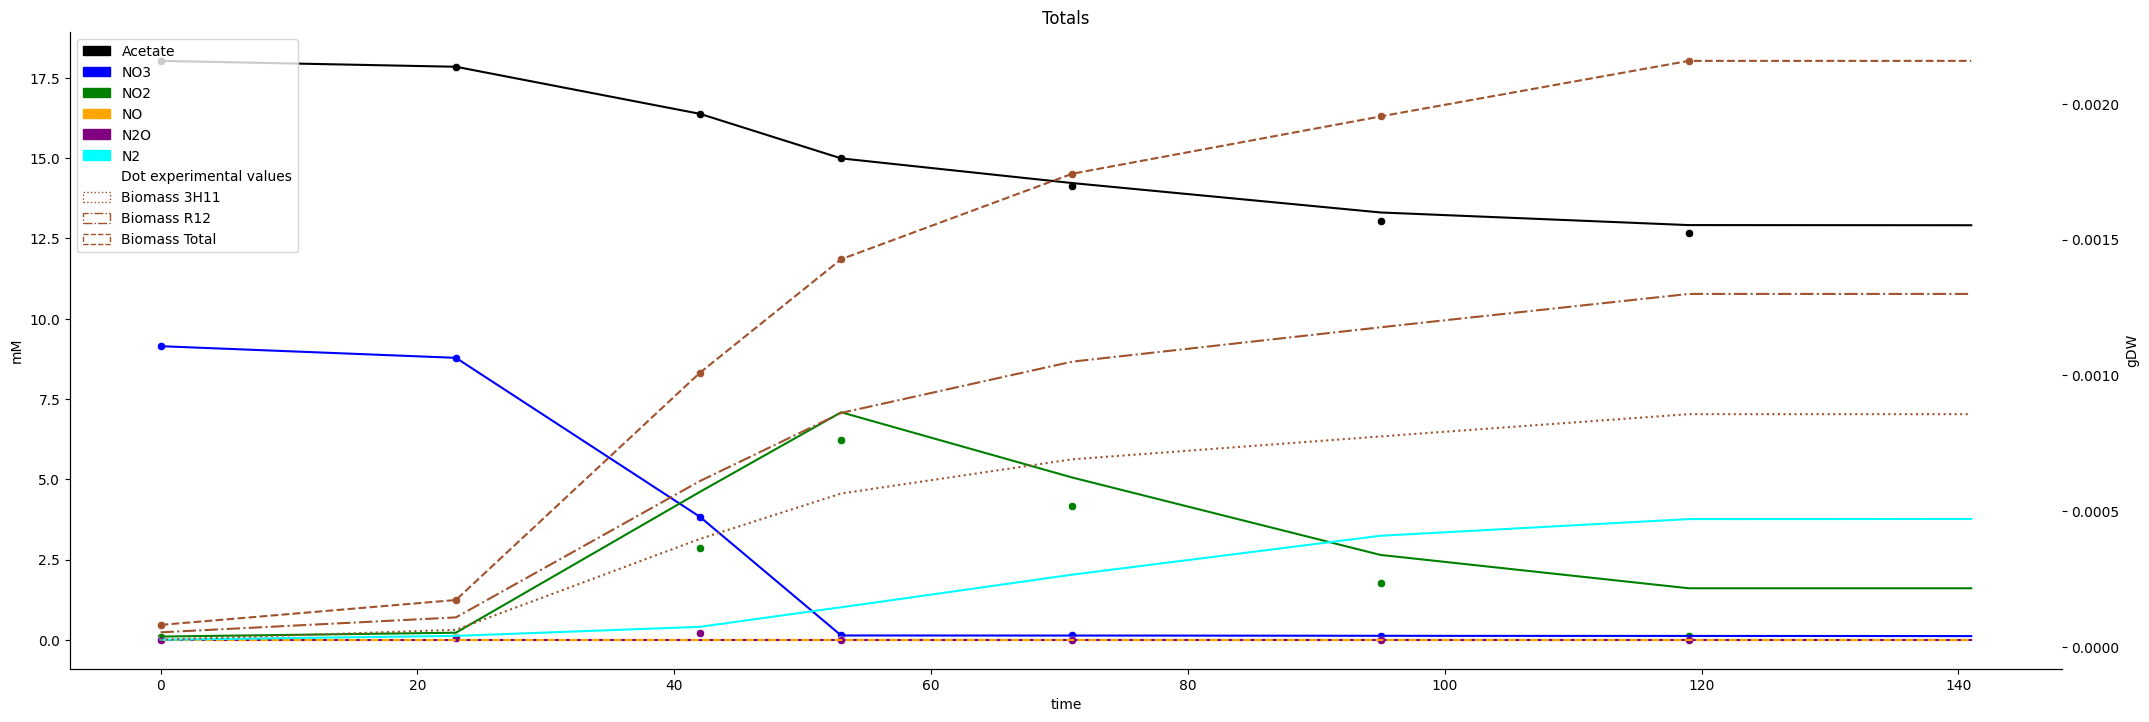

In [87]:
comm_plots.plot_total_acc(comm_plots.generate_total_acc_data(time_steps, solution_exp), exp_syncom)

0.017235952230523568 0.025790144284648424
0.18795672758027854 0.2819128723430007
0.29174506067229306 0.4375922608807124
0.07563621037359602 0.11345541532936516
0.06816862038195193 0.10225368473598587
0.02890278732163769 0.043357024701074755
0.0004451205 0.00066768075


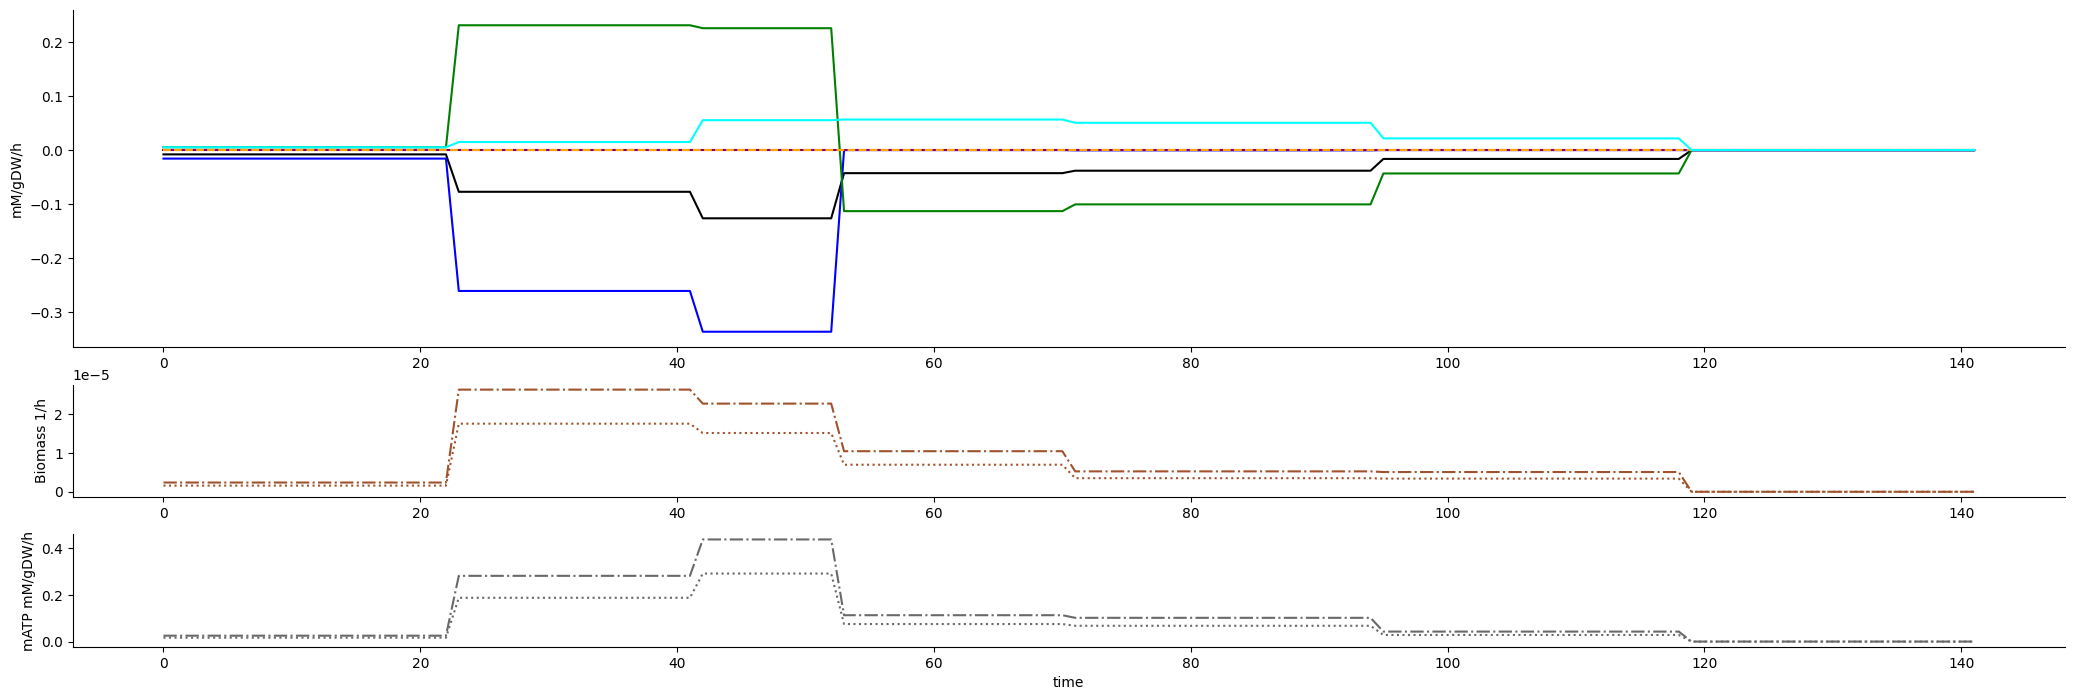

In [88]:
total_uptake_data = comm_plots.generate_total_uptake_data(time_steps, solution_exp)
comm_plots.plot_total_uptake(total_uptake_data)

0.00796337 -0.004310599591887631 -0.00365277040811237
0.077158311 -0.077158311 0
0.126205391 -0.126205391 0
0.04269375811151672 3.4790744698885006e-06 -0.04269723718598661
0.03815497424939133 1.8158306876873995e-06 -0.038156790080079016
0.0163845 9.103466205845817e-07 -0.016385410346620586
0.00020996250000000029 -1.679699999999998e-05 -0.0001931655000000003
0.00796337 3.1887379483308744e-07 -0.007963688873794833
0.077158311 -0.027950392683585568 -0.049207918316414426
0.126205391 4.062738666849031e-06 -0.12620945373866685
0.042694701356297146 3.434324540011234e-06 -0.042698135680837156
0.03815562583312882 1.7607403107767991e-06 -0.038157386573439596
0.0163845 9.103466205861999e-07 -0.016385410346620586
0.00020996249999999985 0 -0.00020996249999999985
0.00796337 -0.0016481876340026166 -0.006315182365997384
0.077158311 -0.077158311 0
0.126205391 -0.12524718956404998 -0.0009582014359500092
0.04269461045798791 3.479074477920843e-06 -0.04269808953246583
0.03815507425409762 1.7494888263041687

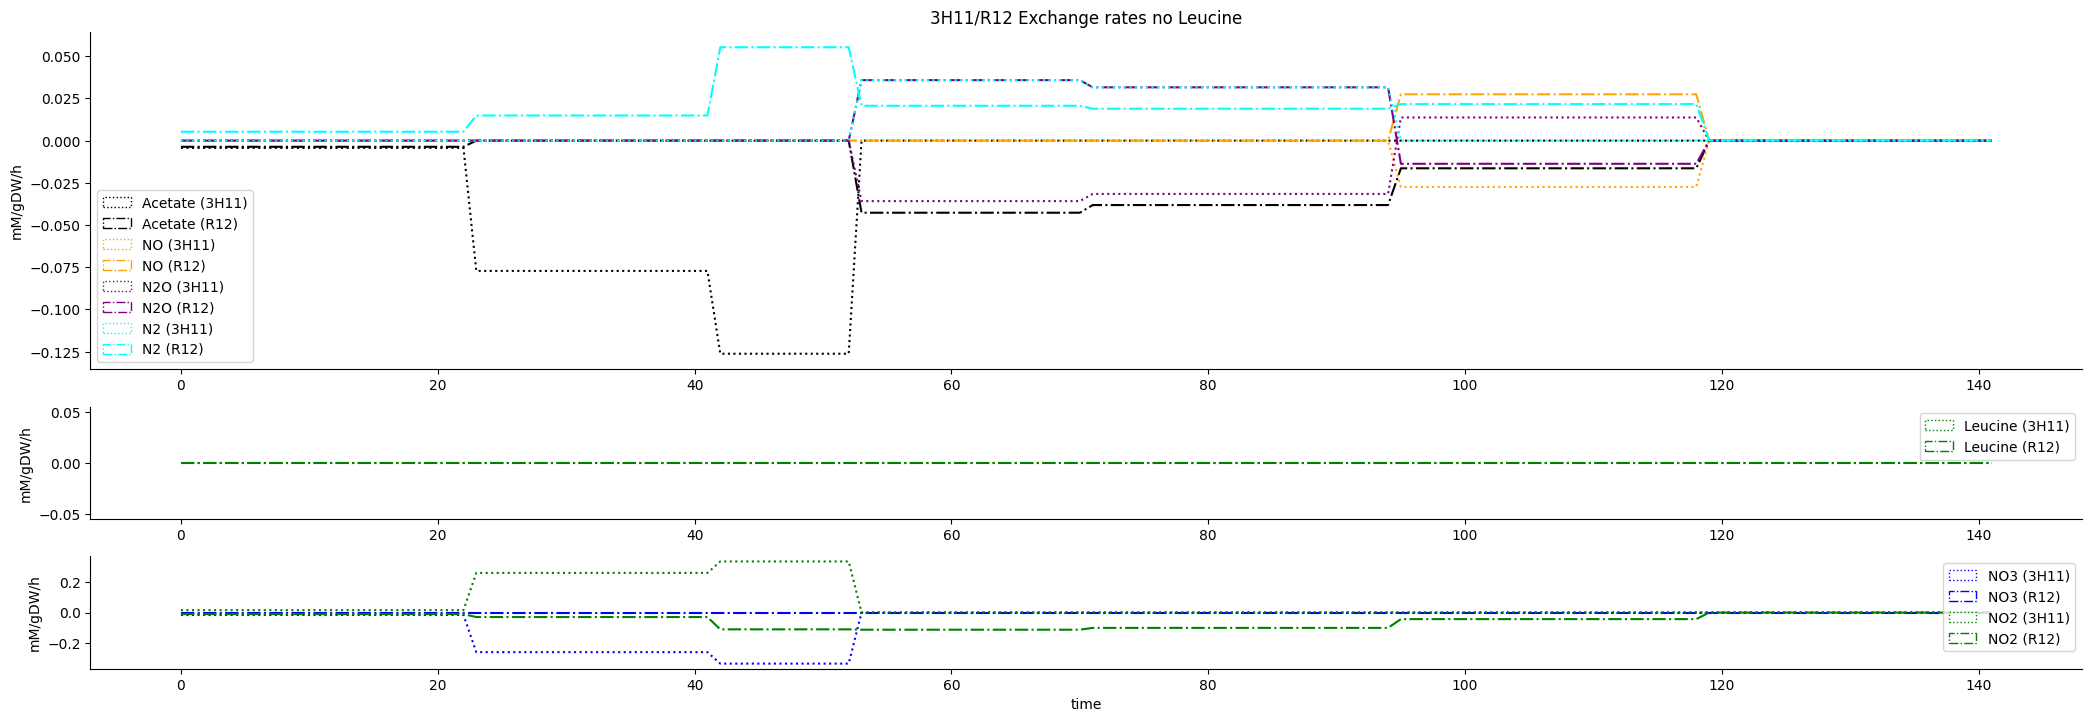

In [89]:
plot_data_zero_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_exp)
plot_data_50_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_50)
plot_data_10_leu = comm_plots.generate_organism_uptake_data(time_steps, solution_leucine_10)
comm_plots.plot_organism_uptake_data(plot_data_zero_leu, title='3H11/R12 Exchange rates no Leucine')

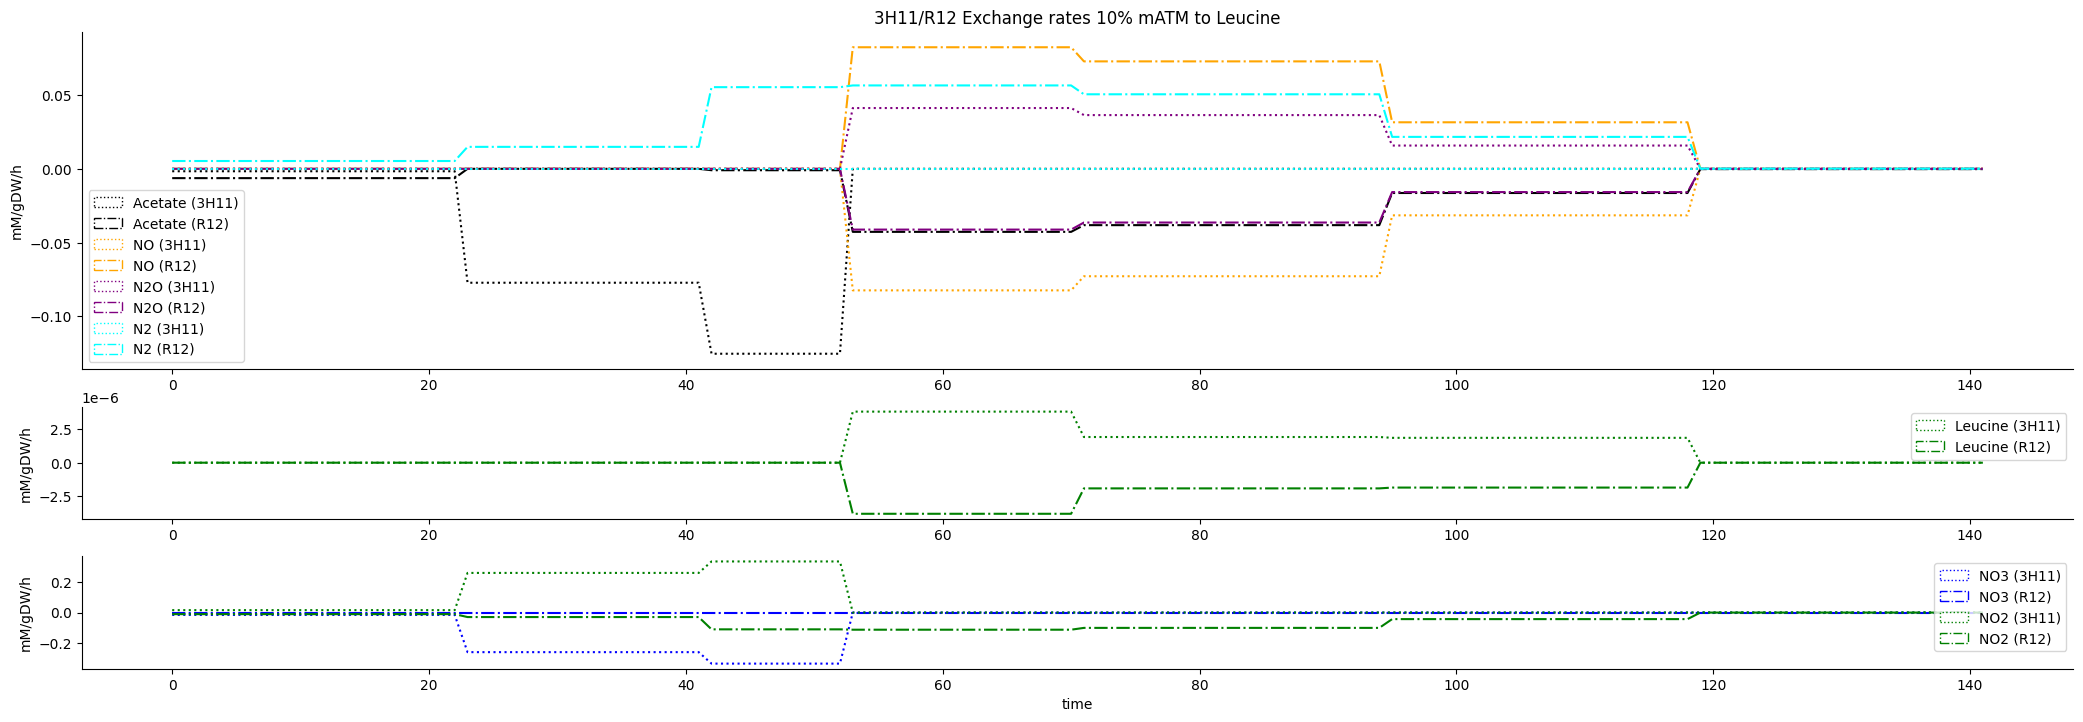

In [90]:
comm_plots.plot_organism_uptake_data(plot_data_10_leu, title='3H11/R12 Exchange rates 10% mATM to Leucine')

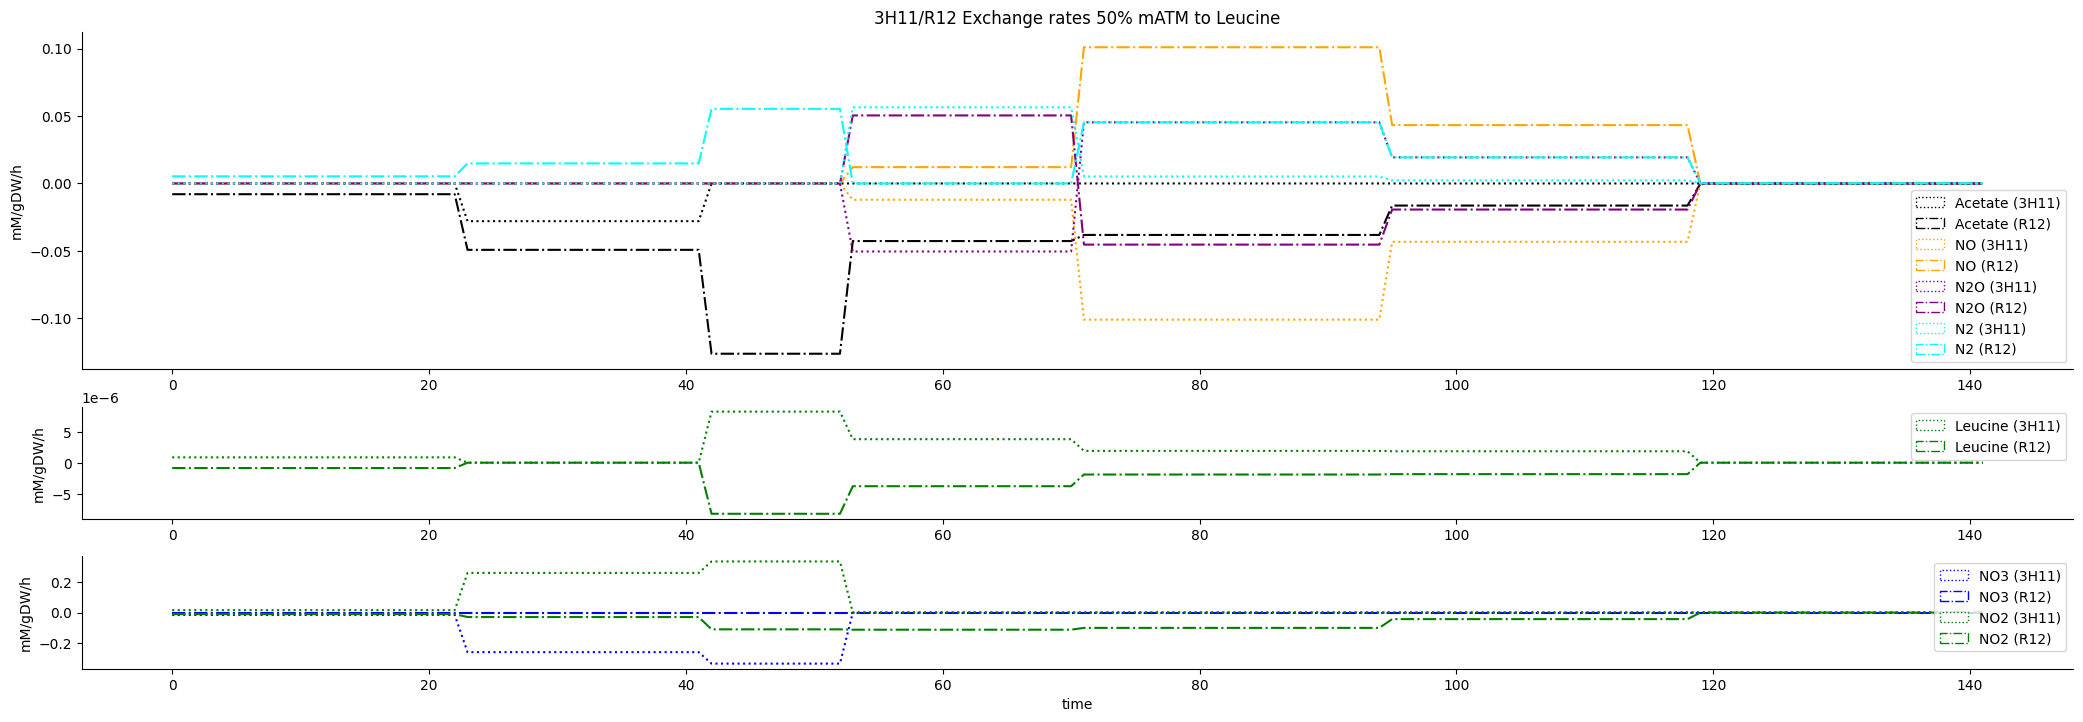

In [91]:
comm_plots.plot_organism_uptake_data(plot_data_50_leu, title='3H11/R12 Exchange rates 50% mATM to Leucine')

In [93]:
print('R12')
#_exp_atpm_steps(model_rhoda, exp_data_r12, df_growth_data_r12.transpose().to_dict())

R12


In [249]:
print('3H11')
_exp_atpm_steps(model_acido, exp_data_3h11, df_growth_data_3h11.transpose().to_dict())

3H11


,total_time,gdw,ac,no3,no2,n2o,atpm,atpm_per_gdw_per_h
0,23.0,0.000006,-0.009394,-0.054518,0.041815,0.0,0.050478,0.002195
1,19.0,0.000009,-0.091716,-0.344241,0.337841,0.0,0.474340,0.024965
2,11.0,0.000005,-0.013321,-0.111735,0.144979,0.0,0.072216,0.006565
3,18.0,0.000006,0.018274,0.000797,0.007772,0.0,NaN,NaN
4,24.0,-0.000003,-0.004143,0.000138,-0.004123,0.0,NaN,NaN


In [94]:
for i in range(7):
    time_step = time_steps[i]
    sol = solution_exp[i]
    print(sol.fluxes['ATPM_cA'], sol.fluxes['ATPM_cR'], sol.fluxes['ATPM_cA']/time_step, sol.fluxes['ATPM_cR']/time_step, 
          (sol.fluxes['ATPM_cA']/time_step)+(sol.fluxes['ATPM_cR']/time_step))
    """
    if sol.fluxes['bio1_A'] != 0:
        print('3H11', sol.fluxes['bio1_A'], sol.fluxes['ATPM_cA'], sol.fluxes['ATPM_cA']/time_step, 
          sol.fluxes['ATPM_cA']/sol.fluxes['bio1_A'])
        
    if sol.fluxes['bio1_R'] != 0:
        print('R12 ', sol.fluxes['bio1_R'], sol.fluxes['ATPM_cR'], sol.fluxes['ATPM_cA']/time_step, 
          sol.fluxes['ATPM_cR']/sol.fluxes['bio1_R'])
    """

0.017235952230523568 0.025790144284648424 0.0007493892274140682 0.0011213106210716706 0.0018706998484857387
0.18795672758027854 0.2819128723430007 0.00989245934633045 0.014837519597000038 0.02472997894333049
0.29174506067229306 0.4375922608807124 0.026522278242935734 0.03978111462551931 0.06630339286845505
0.07563621037359602 0.11345541532936516 0.0042020116874220016 0.006303078629409176 0.010505090316831178
0.06816862038195193 0.10225368473598587 0.0028403591825813305 0.004260570197332745 0.007100929379914075
0.02890278732163769 0.043357024701074755 0.0012042828050682372 0.0018065426958781149 0.003010825500946352
0.0004451205 0.00066768075 1.9353065217391304e-05 2.9029597826086953e-05 4.838266304347826e-05
